## Project: Make Sense of Census
### Problem Statement
Hello!

You have been hired by 'CACT' (Census Analysis and Collection Team) to help with your numpy programming skills. Your major work for today involves census record management and data analysis.

#### About the Dataset
The snapshot of the data, you will be working on:
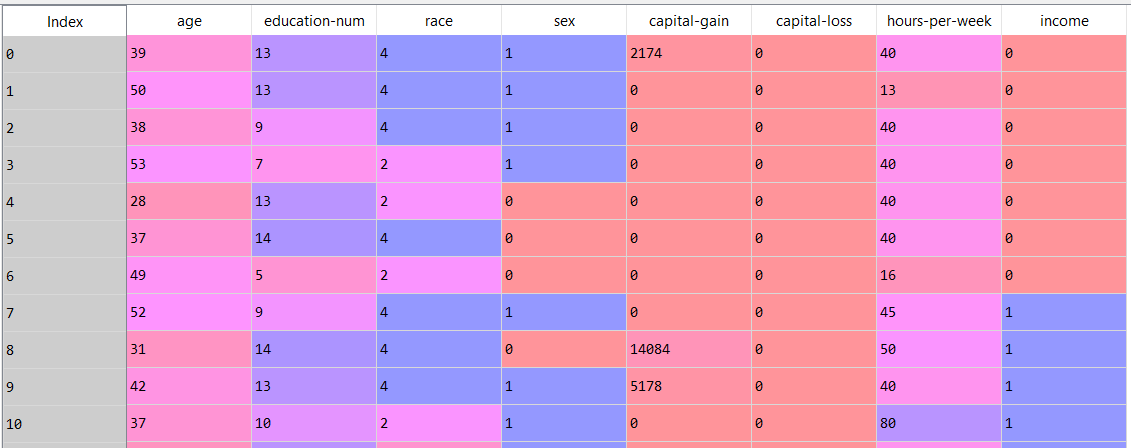
The dataset has details of 100 people with the following 8 features

| Features | Description |
|:--------:|:-----------:|
| age | Age of the person |
| education-num | No. of years of education they had |
| race | Person's race <br> KEY ==> 0 : Amer-Indian-Eskimo<br> 1 : Asian-Pac-Islander<br> 2 : Black<br> 3 : Other<br> 4 : White |
| sex | Person's gender <br> KEY==> 0 : Female <br> 1 : Male |
| capital-gain | Income from investment sources, apart from wages/salary |
| capital loss | Losses from investment sources, apart from wages/salary |
| hours-per-week | No. of hours per week the person works |
| income | Annual Income of the person<br> KEY ==> 0 : Less than or equal to 50K<br> 1 : More than 50K |

#### Why solve this project
After completing this project, you will have a better grip on working with numpy. In this project, you will apply the following concepts:
* Array Appending
* Array Slicing
* Array Filtering
* Array Aggregation

### Instructions : Step 1: 
In this first task, we will load the data to a numpy array and add a new record to it.
* The path to the data set has been stored in the variable named `path`
* Load the dataset and store it in a variable called data using `np.genfromtxt()`
---
```
   Example of genfromtxt function
```
---
```sh
data_file='file.csv' # path for the file
data=np.genfromtxt(data_file, delimiter=",", skip_header=1)
print("\nData: \n\n", data)
print("\nType of data: \n\n", type(data))
```
**Output:**
```sh
Data: 

[[39. 13.  4. ...  0. 40.  0.]
 [50. 13.  4. ...  0. 13.  0.]
 [38.  9.  4. ...  0. 40.  0.]
 ...
 [48. 13.  4. ...  0. 58.  1.]
 [40. 10.  4. ...  0. 40.  0.]
 [39. 13.  4. ...  0. 50.  1.]]

Type of data: 
<class 'numpy.ndarray'>
 ```
---
**Note:**
The parameter `delimiter = ","` is set because the file that we are opening has extension `CSV` (Comma Separated Values)

The parameter `skip_header = 1` is set because the first row of the data (which is called header) contains string values but in our numpy array we need only integers (Remember numpy array can only store data of a single data type)

---
Append `new_record` (given) to `data` using `np.concatenate()` and store the new array in a variable called `census`

---
The shape of `data` should be (1000, 8) and that of `census` should be (1001,8).

---

In [1]:
# Importing header files
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#New record
new_record = [[50,  9,  4,  1,  0,  0, 40,  0]]
new_record = np.asarray(new_record)

#Reading file
data = np.genfromtxt(PATH, delimiter = ",", skip_header = 1)

#Code starts here
census = np.concatenate( (new_record, data) )
print(census.shape)

(1001, 8)


### Step 2: 
We often associate the potential of a country based on the age distribution of the people residing there. We too want to do a simple analysis of the age distribution

**Instructions :**

* Create a new array called `age` by taking only age column (age is the column with index 0) of `census` array.

* Find the max age and store it in a variable called `max_age`.

* Find the min age and store it in a variable called `min_age`.

* Find the mean of the age and store it in a variable called `age_mean`.

* Find the standard deviation of the age and store it in a variable called `age_std`.

* **Ponder whether based on the above statistics, would you classify the country as `young` or `old`?**
---
`max_age` should be 90.

`min_age` should be 17.

`age_mean`, rounded off to two places, should be 38.06.

`age_std`, rounded off to two places, should be13.34.

---

In [2]:
age = census[:,0]
max_age = age.max()
min_age = age.min()
age_mean = np.mean(age)
age_std = np.std(age)
print( max_age, min_age, age_mean, age_std )

90.0 17.0 38.06293706293706 13.341478176165857


### Step 3: 
The constitution of the country tries it's best to ensure that people of all races are able to live harmoniously. Let's check the country's race distribution to identify the minorities so that the government can help them.

* Create four different arrays by subsetting `census` array by Race column (Race is the column with index 2) and save them in `race_0`,`race_1`, `race_2`, `race_3` and `race_4` respectively (Meaning: Store the array where `race` column has value 0 in `race_0`, so on and so forth)
* Store the length of the above created arrays in `len_0`, `len_1`,`len_2`, `len_3` and `len_4` respectively
* Find out which is the race with the minimum no. of citizens
* Store the number associated with the minority race in a variable called `minority_race` (For eg: if `len(race_5)` is the minimum, store 5 in `minority_race` because that is the index of the race having the least no. of citizens )
---
`minority_race` should be 3.

---

In [3]:
race_0 = census[census[:,2] == 0]
race_1 = census[census[:,2] == 1]
race_2 = census[census[:,2] == 2]
race_3 = census[census[:,2] == 3]
race_4 = census[census[:,2] == 4]

len_0 = len(race_0)
len_1 = len(race_1)
len_2 = len(race_2)
len_3 = len(race_3)
len_4 = len(race_4)

minority_race = 0
if len_0 == min(len_0,len_1,len_2,len_3,len_4): minority_race = 0
elif len_1 == min(len_0,len_1,len_2,len_3,len_4): minority_race = 1
elif len_2 == min(len_0,len_1,len_2,len_3,len_4): minority_race = 2
elif len_3 == min(len_0,len_1,len_2,len_3,len_4): minority_race = 3
elif len_4 == min(len_0,len_1,len_2,len_3,len_4): minority_race = 4
print(minority_race)

3


### Step 4: 
As per the new govt. policy, all citizens above age 60 should not be made to work more than 25 hours per week. Let us look at the data and see if that policy is followed.

* Create a new subset array called `senior_citizens` by filtering `census` according to age>60 (age is the column with index 0)
* Add all the working hours (working hours is the column with index 6) of `senior_citizens` and store it in a variable called `working_hours_sum`
* Find the length of `senior_citizens` and store it in a variable called `senior_citizens_len`
* Finally find the average working hours of the senior citizens by dividing `working_hours_sum` by `senior_citizens_len` and store it in a variable called `avg_working hours`.
* Print `avg_working_hours` and see if the govt. policy is followed.
---
`working_hours_sum` should be 1917.

`avg_working_hours`, rounded off to two places, should be 31.43.

---

In [4]:
senior_citizens = census[age > 60]
working_hours_sum = np.sum( senior_citizens[:,6] )
senior_citizens_len = len(senior_citizens)
avg_working_hours = working_hours_sum/senior_citizens_len
print(working_hours_sum, avg_working_hours)

1917.0 31.42622950819672


### Step 5: 
Our parents have repeatedly told us that we need to study well in order to get a good(read: higher-paying) job. Let's see whether the higher educated people have better pay in general.

* Create two new subset arrays called `high` and `low` by filtering `census` according to education-num>10 and education-num<=10 (education-num is the column with index 1) respectively.
* Find the mean of income column (income is the column with index 7) of `high` array and store it in `avg_pay_high`. Do the same for `low` array and store it's mean in `avg_pay_low`.
---
**Note:** - Since income is a binary variable, mean() here represents the percentage of ppl having annual income higher than 50K. - You could have used `mean()` function to solve the task 'Young Country? Old Country?' as well.

---

* Compare `avg_pay_high` and `avg_pay_low` and see whether there is truth in better education leads to better pay
---
**Test Cases:** The correct value in `avg_pay_high` should be 0.43 when rounded upto 2 decimal places. The correct value in `avg_pay_low` should be 0.14 when rounded upto 2 decimal places.

---

In [5]:
high = census[ census[:,1] > 10 ]
low = census[ census[:,1] <= 10 ]
avg_pay_high = np.mean(high[:,7])
avg_pay_low = np.mean(low[:,7])
print(avg_pay_high, avg_pay_low)

0.42813455657492355 0.13649851632047477
